<h1>How to import raster data from data cube</h1>

In [1]:
import datacube as odc

In [2]:
Ds = odc.Datacube().load(product='ga_ls8c_nbart_gm_cyear_3', 
    time         = ("2015-01-01", "2018-12-31"),
    latitude     = (-27.5, -27.55),                             # Y-axis (down,up)     (<--,-->)
    longitude    = (153.1, 153.15),                             # X-axis (right,left)  (<--,-->)
    resolution   = (-0.000269494585236,0.000269494585236),     # 10x real resulution
    # measurements = ["red","green","blue"],
    # measurements = ["red","green","blue","nir","swir1","swir2"],
    output_crs   = "EPSG:4326") 
ds = Ds.isel(time=0)
print(ds)

<xarray.Dataset>
Dimensions:      (latitude: 187, longitude: 186)
Coordinates:
    time         datetime64[ns] 2015-07-02T11:59:59.999999
  * latitude     (latitude) float64 -27.5 -27.5 -27.5 ... -27.55 -27.55 -27.55
  * longitude    (longitude) float64 153.1 153.1 153.1 ... 153.1 153.1 153.1
    spatial_ref  int32 4326
Data variables:
    blue         (latitude, longitude) int16 343 546 681 681 ... 1039 723 402
    green        (latitude, longitude) int16 487 723 828 828 ... 1299 953 523
    red          (latitude, longitude) int16 523 750 863 863 ... 1372 1011 544
    nir          (latitude, longitude) int16 2121 2125 1645 ... 3252 2797 2178
    swir1        (latitude, longitude) int16 1529 1661 1427 ... 2860 2588 1775
    swir2        (latitude, longitude) int16 976 1086 1032 ... 1912 1629 1037
    sdev         (latitude, longitude) float32 0.003322 0.00207 ... 0.008031
    edev         (latitude, longitude) float32 307.4 237.6 170.6 ... 618.8 661.8
    bcdev        (latitude, longi

<h1>Data Analyze</h1>

In [3]:
ds.red

<xarray.DataArray 'red' (latitude: 187, longitude: 186)>
array([[ 523,  750,  863, ...,  591,  524,  426],
       [ 667,  784,  784, ...,  528,  445,  425],
       [ 826,  935,  812, ...,  511,  485,  485],
       ...,
       [ 751, 1169, 1151, ...,  721,  721,  506],
       [1134, 1245, 1239, ..., 1491, 1131,  580],
       [1287, 1252, 1208, ..., 1372, 1011,  544]], dtype=int16)
Coordinates:
    time         datetime64[ns] 2015-07-02T11:59:59.999999
  * latitude     (latitude) float64 -27.5 -27.5 -27.5 ... -27.55 -27.55 -27.55
  * longitude    (longitude) float64 153.1 153.1 153.1 ... 153.1 153.1 153.1
    spatial_ref  int32 4326
Attributes:
    units:         1
    nodata:        -999
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

In [4]:
ds.red.values

array([[ 523,  750,  863, ...,  591,  524,  426],
       [ 667,  784,  784, ...,  528,  445,  425],
       [ 826,  935,  812, ...,  511,  485,  485],
       ...,
       [ 751, 1169, 1151, ...,  721,  721,  506],
       [1134, 1245, 1239, ..., 1491, 1131,  580],
       [1287, 1252, 1208, ..., 1372, 1011,  544]], dtype=int16)

In [5]:
red = ds.red.values
nir = ds.nir.values

In [6]:
ndvi = (red-nir)/(red+nir)

In [7]:
ndvi

array([[-0.60438729, -0.47826087, -0.31180223, ..., -0.61573472,
        -0.66740717, -0.72960965],
       [-0.50865562, -0.43105951, -0.43105951, ..., -0.68115942,
        -0.73769525, -0.73253619],
       [-0.44075829, -0.36502547, -0.34436819, ..., -0.69244658,
        -0.72094361, -0.72094361],
       ...,
       [-0.52272005, -0.39162113, -0.4256487 , ..., -0.53090436,
        -0.53090436, -0.65127498],
       [-0.38569881, -0.36946062, -0.3801901 , ..., -0.33154001,
        -0.407388  , -0.60027567],
       [-0.34269663, -0.35546976, -0.39189529, ..., -0.40657439,
        -0.46901261, -0.6002939 ]])

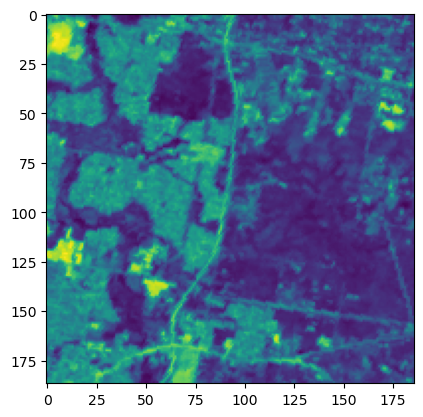

In [8]:
import matplotlib.pyplot as plt
plt.imshow(ndvi)

<center><a href="https://lazyearth.org/install/install.html"><img src="https://camo.githubusercontent.com/c2dc87c0dd76c83e820eb680e313687fe39e42ecdb6f2c40525701ce96321943/68747470733a2f2f6c617a7965617274682e6f72672f6c6f676f2f6c6f676f5f6f6e5f507950492e737667" width=70%></a.</center>

In [9]:
pip install lazyearth

Note: you may need to restart the kernel to use updated packages.


In [10]:
from lazyearth.common import objearth as oe
from lazyearth.water import water
from lazyearth.virtual import superresolution
from lazyearth.rsi import index 

Lazyearth version : 1.0.55 Krub


<h3>Plotshow</h3>

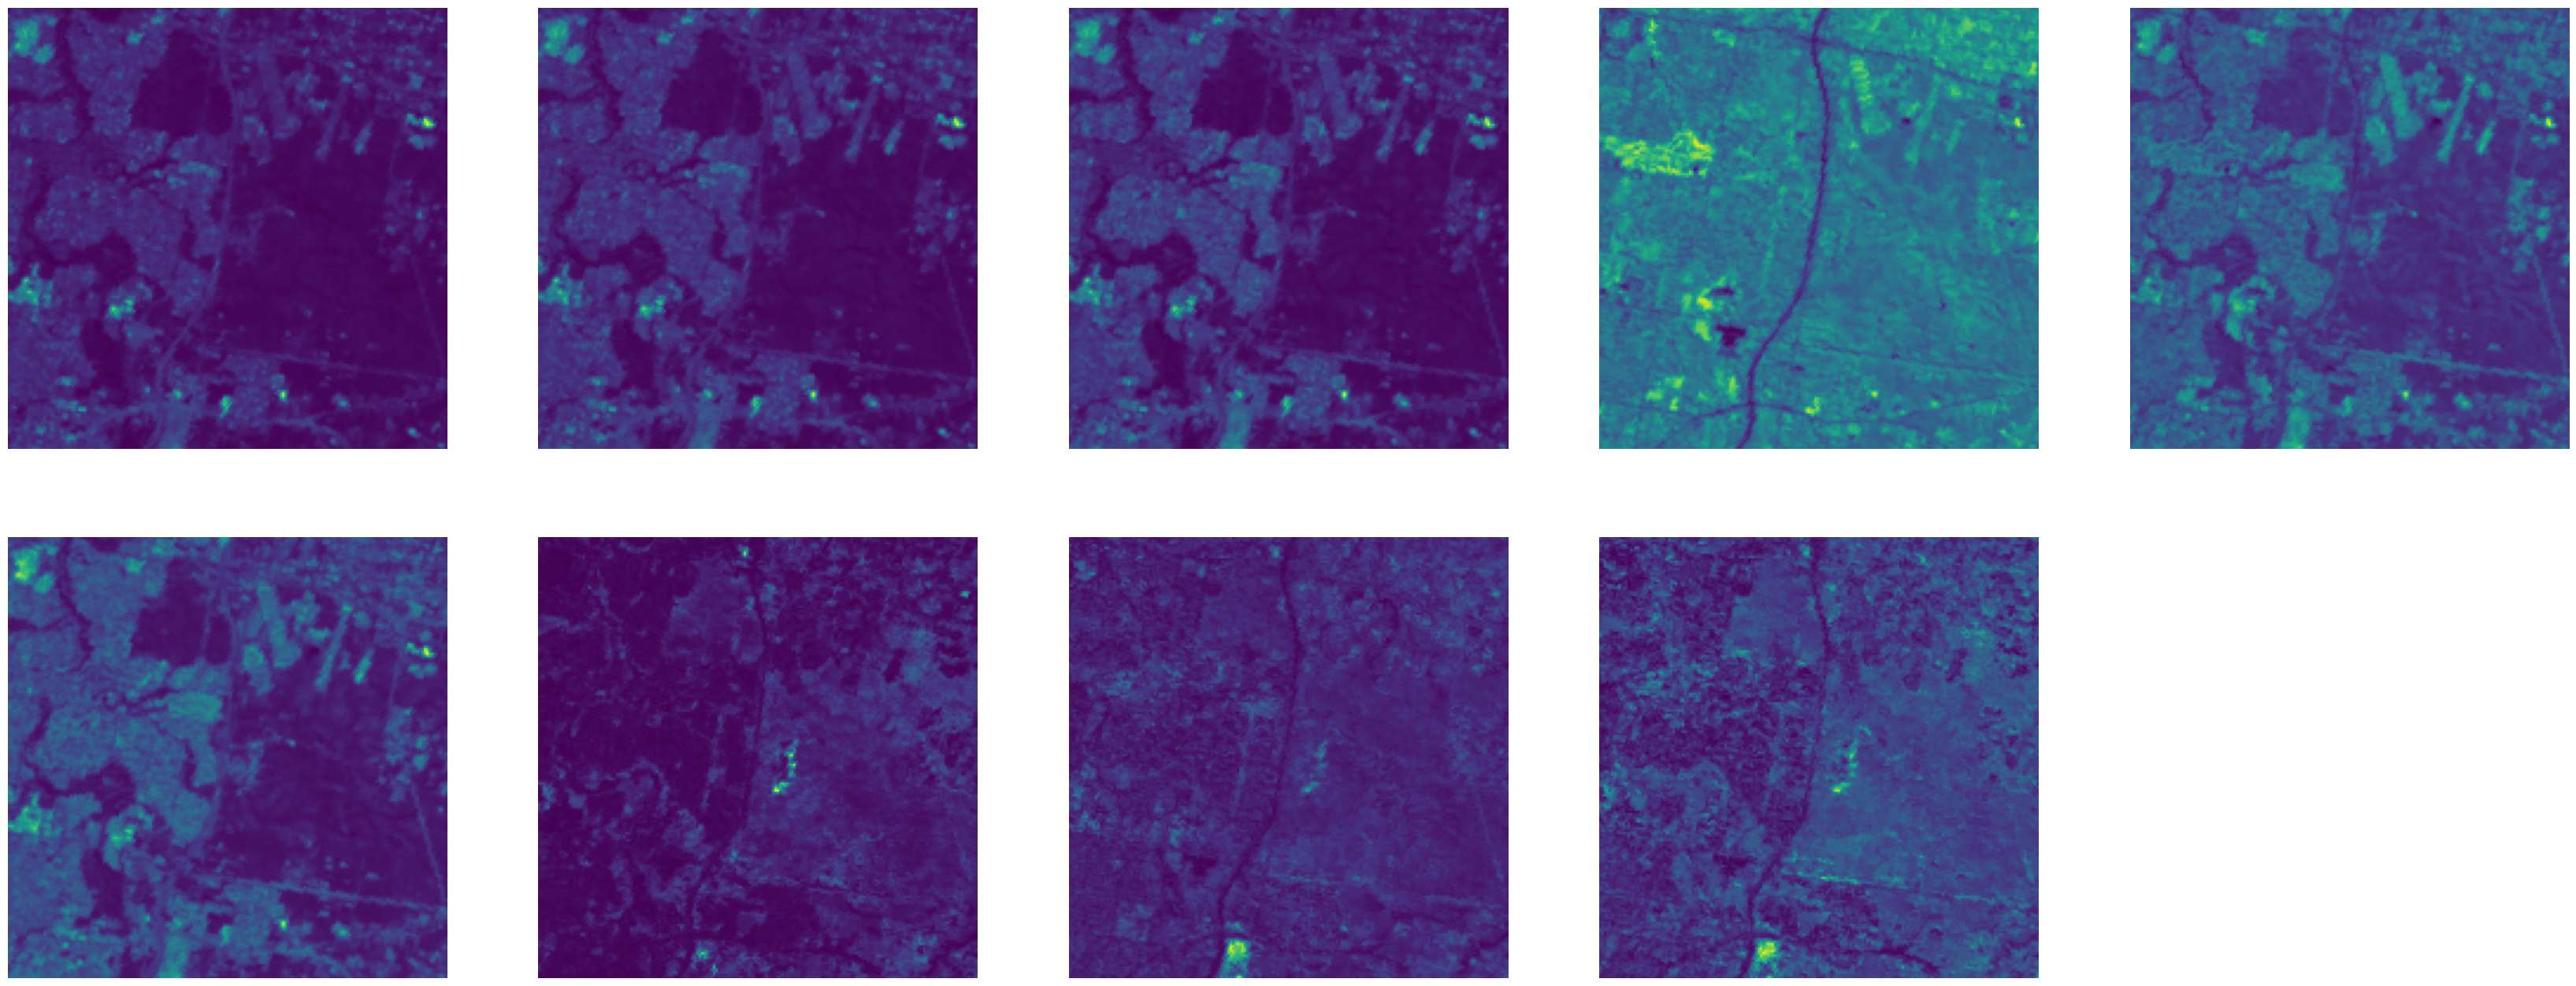

In [11]:
oe.plotshow(ds.blue,ds.green,ds.red,ds.nir,ds.swir1,ds.swir2,ds.sdev,ds.edev,ds.bcdev)

<h3>bandcombination</h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


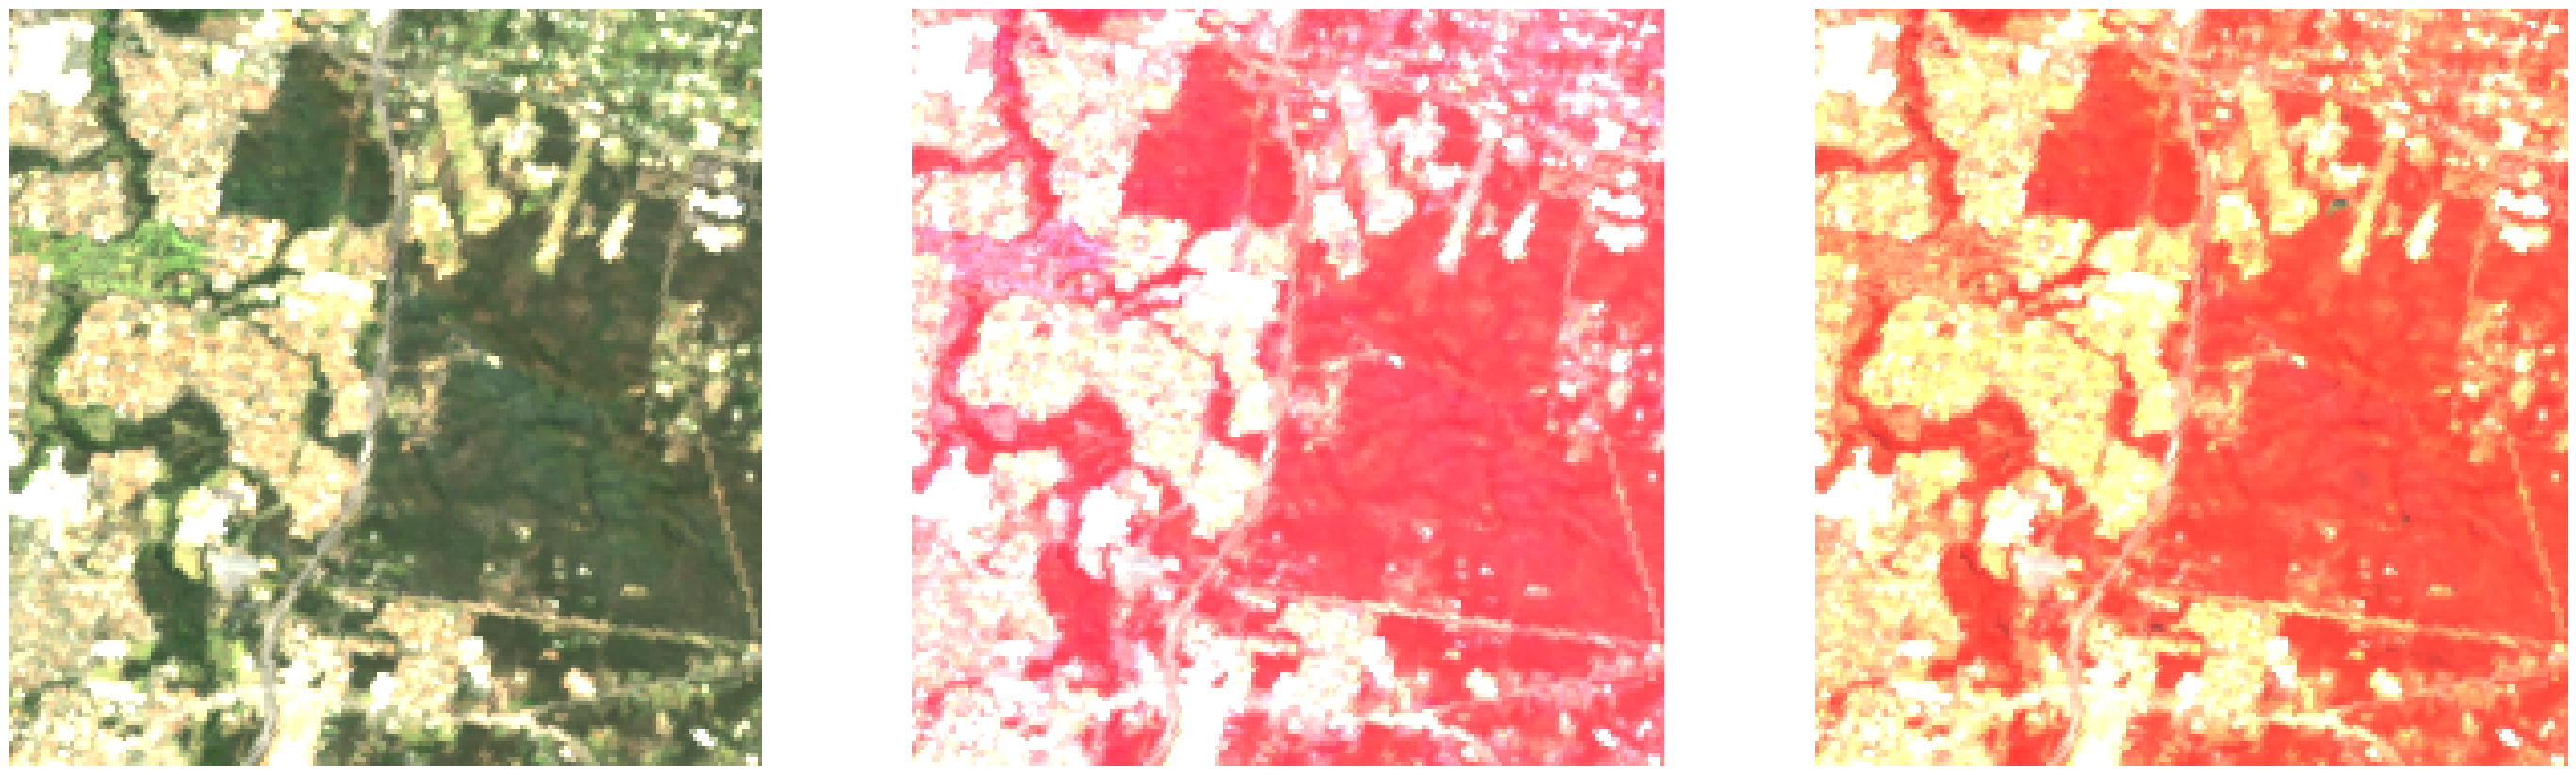

In [12]:
rgb = oe.bandcombination(ds.red,ds.green,ds.blue)
nrg = oe.bandcombination(ds.nir,ds.red,ds.green)
s1rb = oe.bandcombination(ds.swir1,ds.red,ds.blue)
oe.plotshow(rgb,nrg,s1rb)

<h3>indexing</h3>

In [13]:
v01 = index.NDVI(ds)
v02 = index.EVI(ds)
v03 = index.NDMI(ds)
v04 = index.BSI(ds)
v05 = index.NDWI(ds)
v06 = index.NMDI(ds)
v07 = index.NDDI(ds)
# v08 = index.NDWI(ds)
# v09 = index.AVI(ds)
# v10 = index.SI(ds)
# v11 = index.NDSI(ds)
# v12 = index.NDGI(ds)
# v13 = index.NBRI(ds)
# v14 = index.NDGI(ds)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


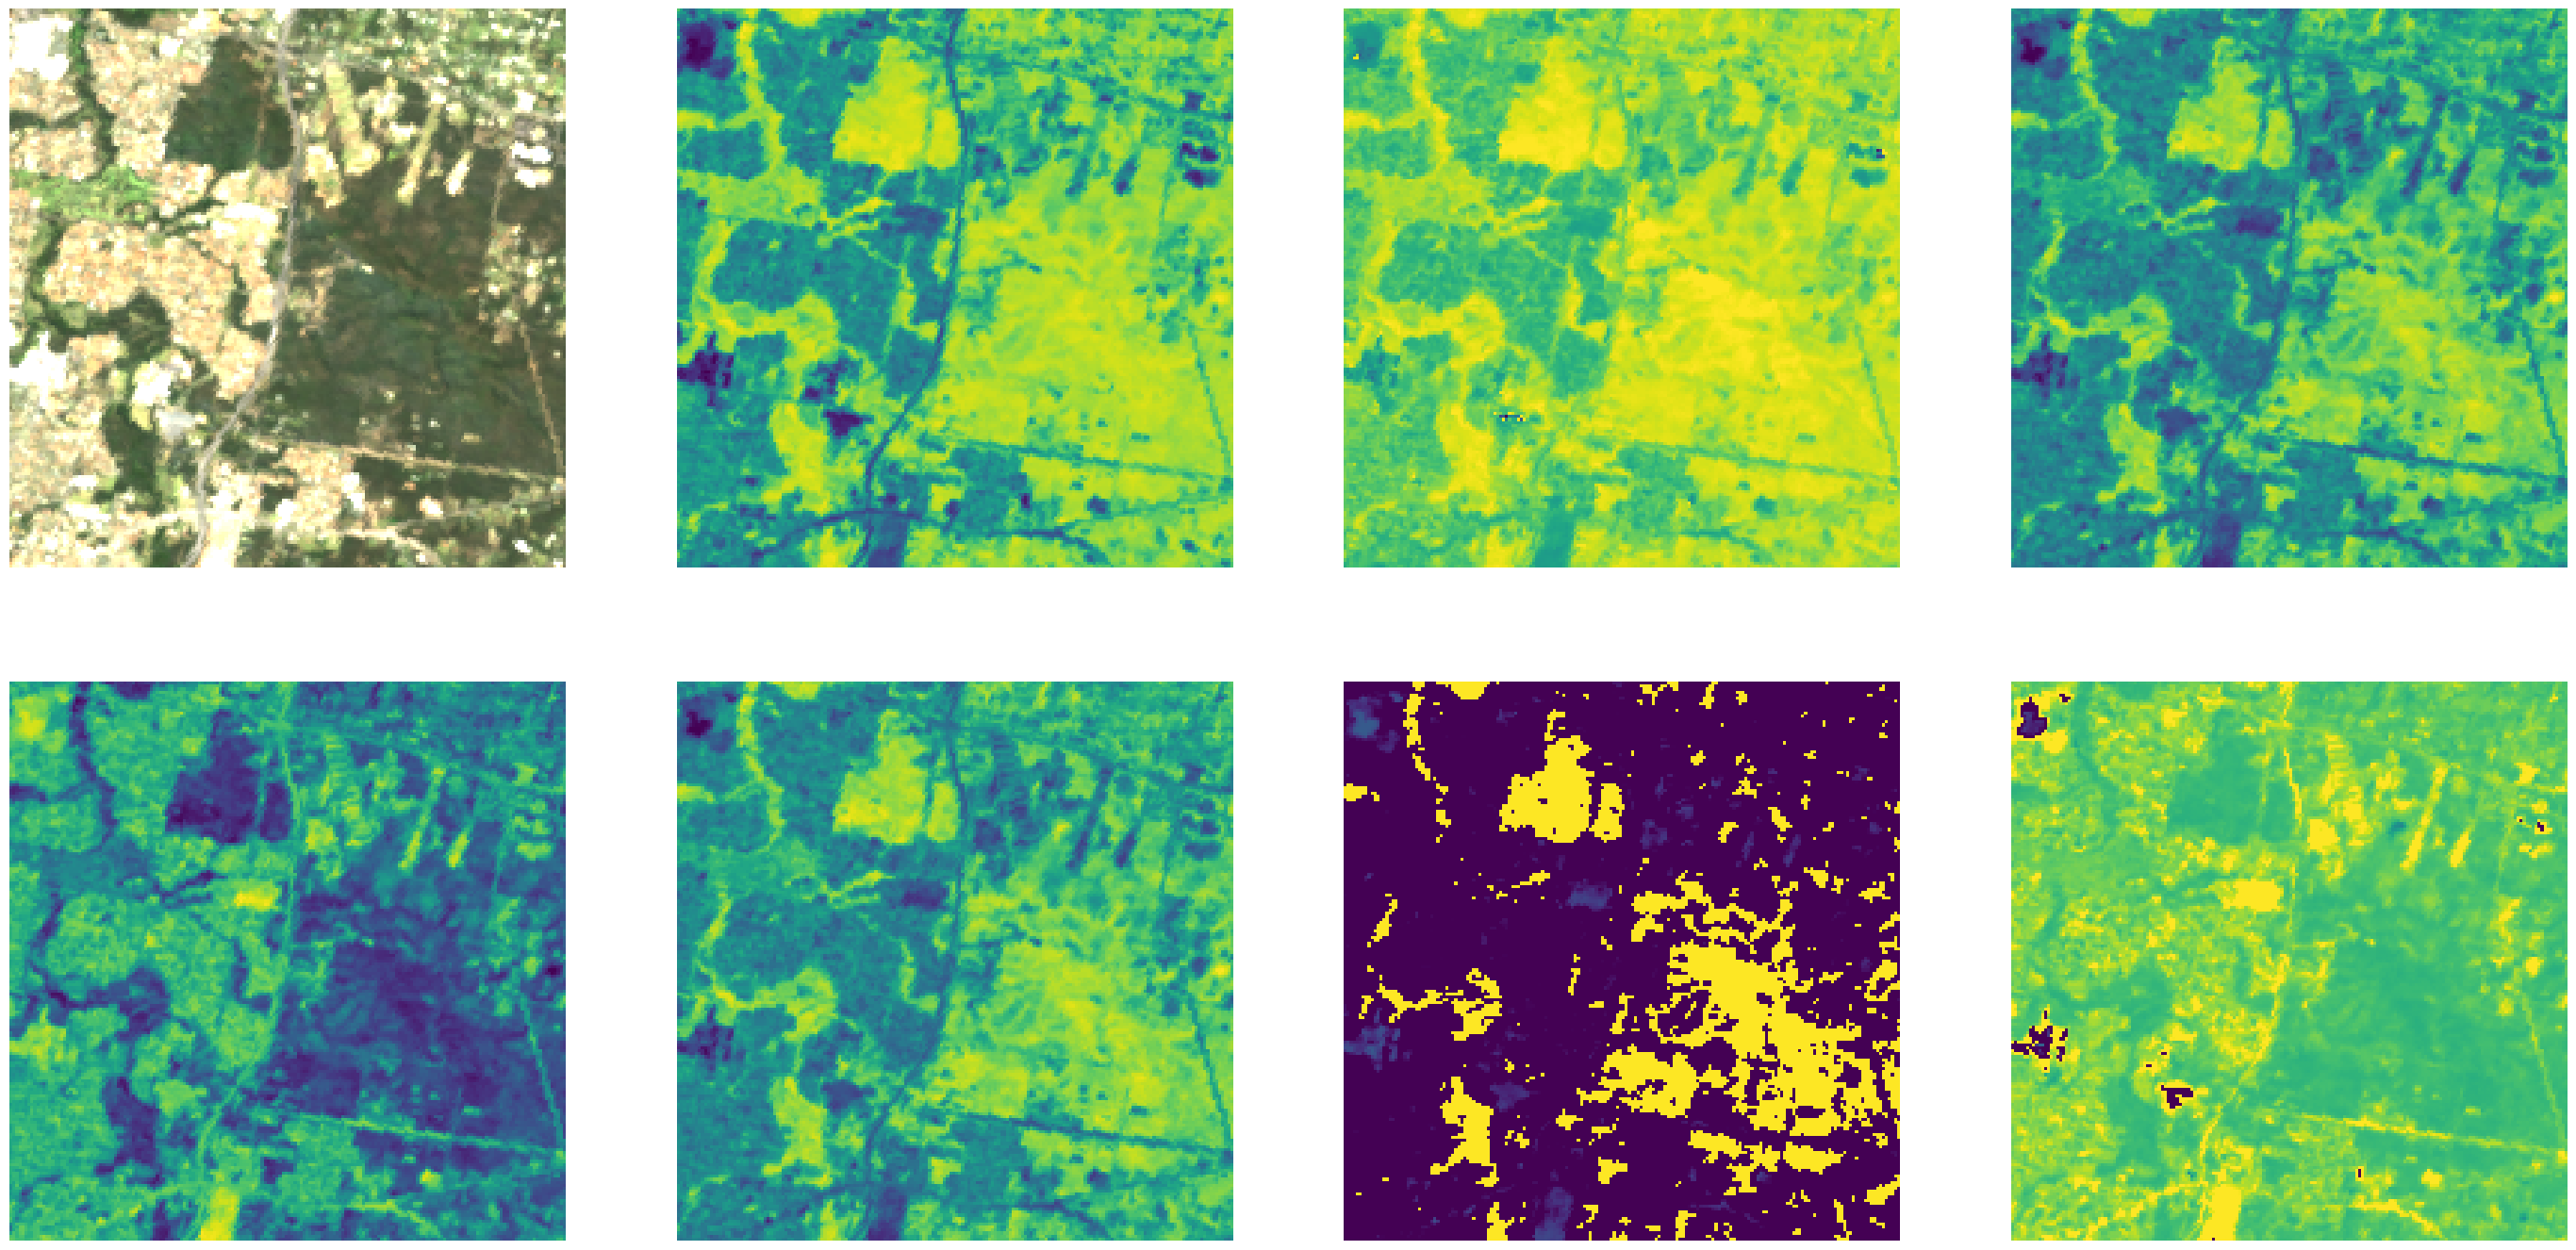

In [14]:
oe.plotshow(rgb,v01,v02,v03,v04,v05,v06,v07)
# oe.plotshow(rgb,v08,v09,v10,v11,v12,v13,v14)

<h3>Colormap</h3>

In [15]:
from lazyearth import leafwood as leafwood
from lazyearth import bluesea as bluesea

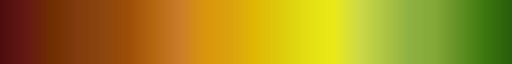

In [16]:
leafwood()

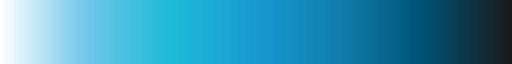

In [17]:
bluesea()

<Figure size 700x700 with 0 Axes>

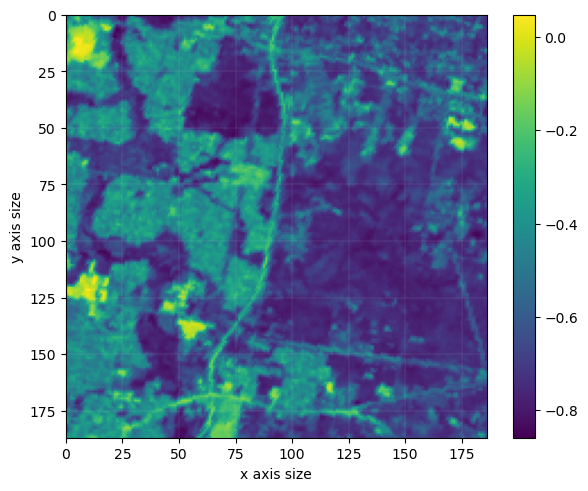

In [18]:
oe.plotshow(ndvi)

<Figure size 700x700 with 0 Axes>

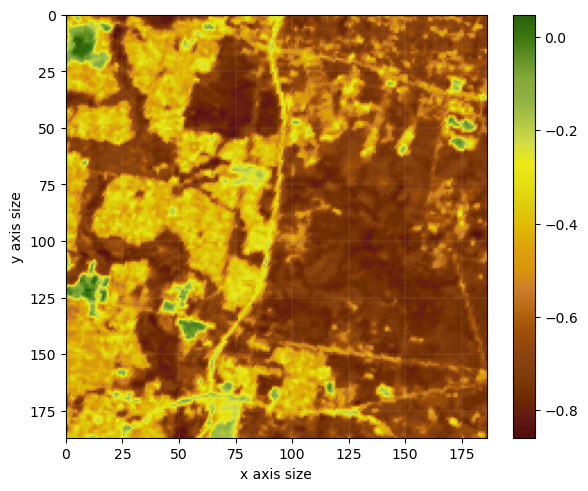

In [19]:
oe.plotshow(ndvi,cmap=leafwood())

<h2>Water</h2>

In [20]:
import datacube as odc
from lazyearth.common import objearth as oe
Ds = odc.Datacube().load(product='ga_ls8c_nbart_gm_cyear_3', 
    time         = ("2015-01-01", "2018-12-31"),
    latitude     = (-27.7, -27.8),                             # Y-axis (down,up)     (<--,-->)
    longitude    = (153.38, 153.48),                            # X-axis (right,left)  (<--,-->)
    resolution   = (-0.000269494585236,0.000269494585236),   # 10x real resulution
    measurements = ["red","green","blue","nir","swir1","swir2"],
    output_crs   = "EPSG:4326") 
ds = Ds.isel(time=0)

In [21]:
W = water(ds)

<h3>Waterdetect</h3>

<Figure size 700x700 with 0 Axes>

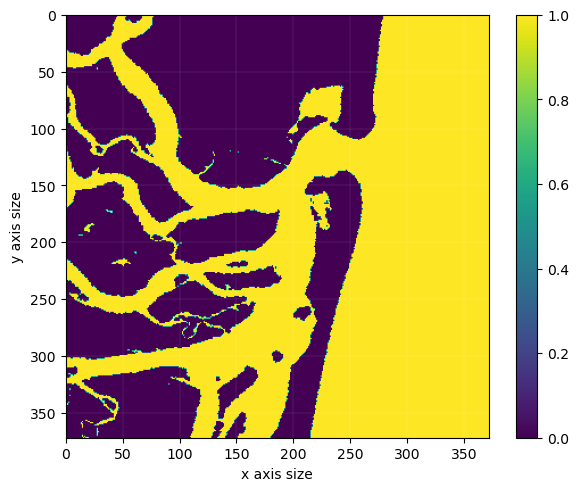

In [22]:
Wd = W.waterdetect()
oe.plotshow(Wd)

<h3>Waterquality</h3>

/env/lib/python3.8/site-packages/lazyearth/water.py:731: RuntimeWarning: divide by zero encountered in divide
  tsm = a * Red / (1- (Red/c)) + b


<Figure size 700x700 with 0 Axes>

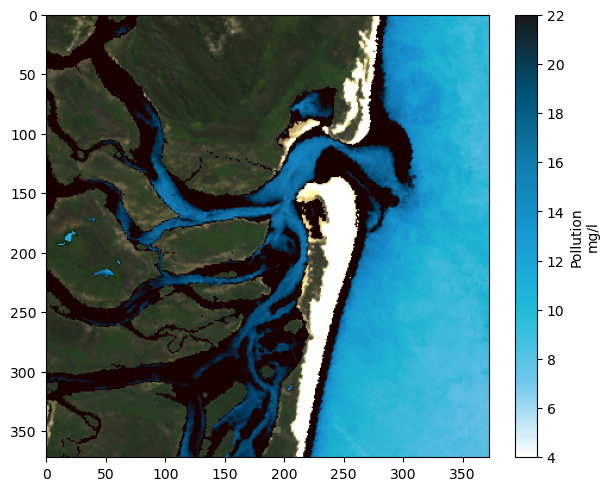

In [23]:
Wq = W.waterquality()
oe.plotshow(Wq)

/env/lib/python3.8/site-packages/lazyearth/water.py:731: RuntimeWarning: divide by zero encountered in divide
  tsm = a * Red / (1- (Red/c)) + b


<Figure size 700x700 with 0 Axes>

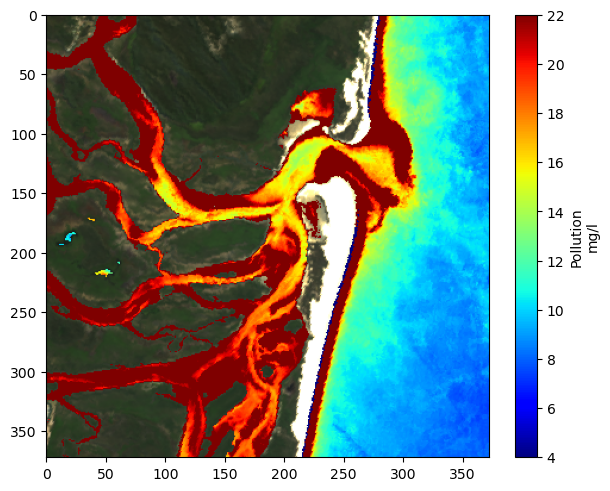

In [24]:
Wq = W.waterquality(colormap='jet')
oe.plotshow(Wq)

<h3>Super resolution</h3>

In [25]:
rgb = oe.bandcombination(ds.red,ds.green,ds.blue)
enhanced = superresolution(rgb)

2023-09-19 06:51:19.714339: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


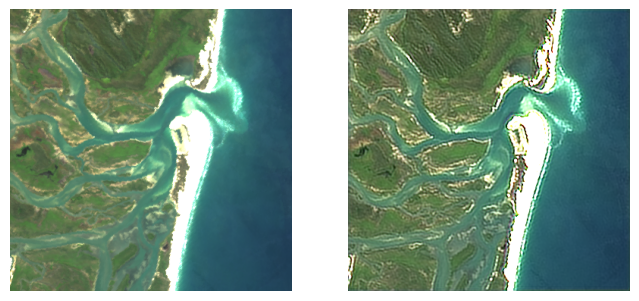

In [26]:
oe.plotshow(rgb,enhanced)